# Lab 5-1: Calculating the Water Balance for the area draining to Cedar Lake, Washington
---

We are going to use observational data to test the conservation of mass in a watershed.  Monthly climate data are from the Cedar Lake station at 1560 ft elevation, at a latitude of 47.25 N and longitude of 121.44 W: [monthly climate from 7/1/1898 to 6/10/2016](https://wrcc.dri.edu/cgi-bin/cliMAIN.pl?wa1233)).   Streamflow is from USGS gauge 12116400 for years 2001-2019.  The gauge is listed as having an area of 217 $km^2$.  Monthly ET is from climatological [maps](http://www.cpc.ncep.noaa.gov/soilmst/e.shtml).  Pan evaporation is from the [Western Regional Climate Center WRCC](https://wrcc.dri.edu/Climate/comp_table_show.php?stype=pan_evap_avg). The Maple Leaf Reservoir site in Seattle, at a lower elevation, operated 1941 to 1960, and the Lake Kachess site, at a higher elevation, operated 1931-1977.  Note the different units and time periods.  This is often what you get from observational data.  Your job is to make sense of it. 

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

Load the csv file with these various measurements from the Cedar River Watershed or nearby vicinity. 

In [2]:
# Read in a .xlsx file
data = pd.read_csv('../data/Cedar_average_monthly_waterbalance.csv')
data.head()

,month,Avg_max_T_degF,Avg_min_T_degF,Avg_total_P_in,Avg_streamflow_cfs,Avg_ET_mm_per_month,Pan_evap_MapleLeaf_inches_per_month,Pan_evap_LakeKachess_inches_per_month
0,1,40.0,30.1,13.52,218,3,0.61,0.00
1,2,43.8,31.5,10.06,141,7,0.82,0.00
2,3,47.6,33.0,10.36,132,17,1.80,0.00
3,4,53.7,36.2,8.01,130,30,3.26,2.37
4,5,60.8,41.4,6.52,142,50,4.64,4.82


These data are month of year (1=January), monthly average values of maximum temperature ($^\circ$F), minimum temperature ($^\circ$F), total precipitation (inches), average streamflow (cubic feet per second, cfs), evapotranspiration, ET (mm per month), pan evaporation at Maple Leaf Reservoir in Seattle (inches per month), and pan evaporation at Lake Kachess near Snoqualmie Pass (inches per month).

Plot the temperature data.

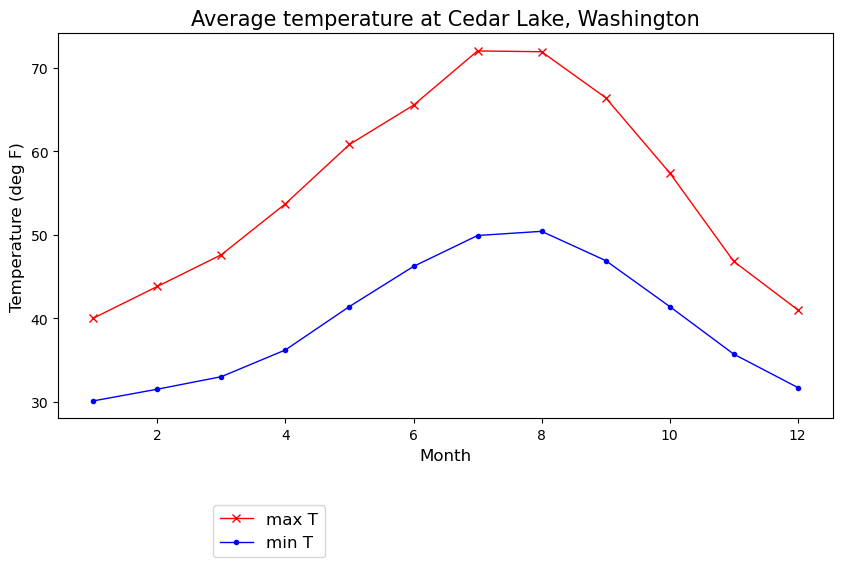

In [3]:
fig, ax = plt.subplots(figsize=(10,5))

data.plot(x='month', y='Avg_max_T_degF', c='r', linestyle='-', linewidth=1, marker='x', ax=ax, label='max T')
data.plot(x='month', y='Avg_min_T_degF', c='b', linestyle='-', linewidth=1, marker='.', ax=ax, label='min T')

ax.set_title('Average temperature at Cedar Lake, Washington', fontsize=15)
ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('Temperature (deg F)', fontsize=12);
plt.legend(loc=(0.2,-0.36), fontsize=12);

**How is temperature related to the water balance?** What do you know about the total elevation range that drains to Cedar Lake?  What do you know about how temperature changes with elevation?  Do you think there are times when precipitation may fall as snow or as a mix of rain and snow?  How do you think this will affect the monthly water balance?  

---
## **Basic Water Balance**

Over a watershed, we can define the monthly change in storage as the sum of water input minus water output.

$$ \Delta S = P - ET - Q $$

where $\Delta$S is change in storage, $P$ is area-average precipitation, $ET$ is area-average evapotranspiration, and $Q$ is basin runoff, normalized by basin area.

**Let's calculate the change in storage each month, in mm.**
First, convert everything to the same units.  Then combine.

1 inch = 25.4 mm

1 foot = 0.3048 m

Basin area = 217 km$^2$

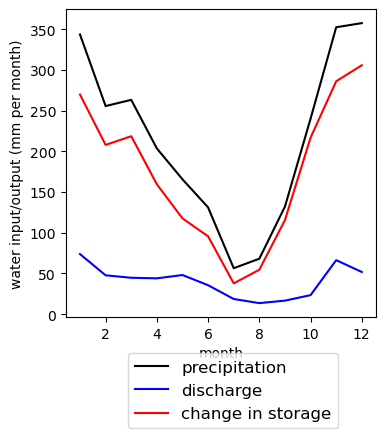

In [4]:
# As an example, I'll set up a plot where I ignore ET and calculate delta_S based only on 
# precipitation and discharge.  Your job is to add in ET to the calculation and the plot.  
# See how your answer differs if you assume ET is equal to either of the pan evaporation measurements.

P_mm = 25.4*data.Avg_total_P_in
# The above is total precip per month, on average, in mm

Q_mm_per_sec = 1000*(0.3048)**3/(217*1000*1000)*data.Avg_streamflow_cfs
# check my unit conversions here -- I converted km to m and feet to meter and then multiplied by 1000 to get mm

# Now we also need mm per month.  I will assume 30 days per month to scale up.  You may want to be more precise.
Q_mm_per_month = Q_mm_per_sec*3600*24*30

Delta_S = P_mm - Q_mm_per_month

fig, ax = plt.subplots(figsize=(4,4))

ax.plot(data.month,P_mm,c='k',label='precipitation');
ax.plot(data.month,Q_mm_per_month,c='b',label='discharge');
ax.plot(data.month,Delta_S,c='r',label='change in storage');

# Scatterplot

ax.set_xlabel('month')
ax.set_ylabel('water input/output (mm per month)');
plt.legend(loc=(0.2,-0.36), fontsize=12);


**Think about your plot**: Does the seasonality of the values make sense?

In the western U.S., changes in storage in a mountain watershed over a year tend to positive sometimes and negative other times, but on average, sum to 0 over the year.  Is that true here?

Calculate the annual sums of each of the values in your monthly water balance above.

In [5]:
# I'll sum the precipitation, and then you do the rest.  Print out the values.
P_annual = np.sum(P_mm)
print(P_annual)

2568.448


# Now sum all of those sums to see what that annual residual is for the watershed.  Again, we expect this to be close to 0.

If your value is not close to 0, think about what else might be happening here.  You may want to look a the web links with historical information about the watershed or look at your lecture notes.  You may want to discuss with another classmate.